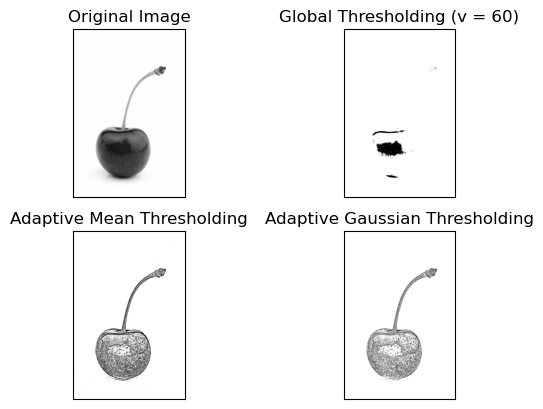

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

image_path = r"C:\Users\estya\OneDrive\Desktop\chery.jpg"
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)  # pass flag here

ret, th1 = cv.threshold(img, 60, 255, cv.THRESH_BINARY)
# Adaptive Thresholding
# the second last parameter is blockSize and it should be odd number
# the last parameter is C which is subtracted from the mean or weighted mean
# normally it is positive but it can be negative as well

th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
# Gaussian Adaptive Thresholding
# 
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

titles = ['Original Image', 'Global Thresholding (v = 60)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

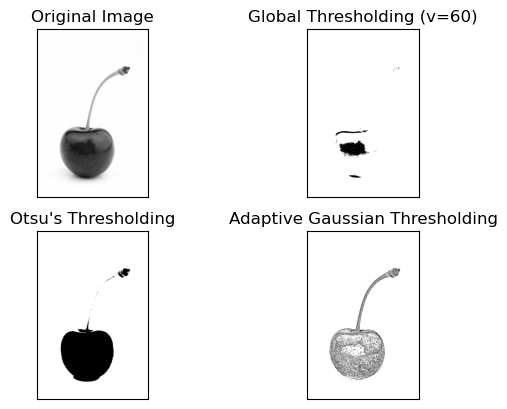

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the grayscale image

image_path = r"C:\Users\estya\OneDrive\Desktop\chery.jpg"
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE) 

# Apply global thresholding
ret1, th1 = cv2.threshold(img, 60, 255, cv2.THRESH_BINARY)

# Apply Otsu's thresholding
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply adaptive mean thresholding
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply adaptive Gaussian thresholding
th4 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Plot the results
titles = ['Original Image', 'Global Thresholding (v=60)', "Otsu's Thresholding", 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th4]

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Multicolored Image thresholding 

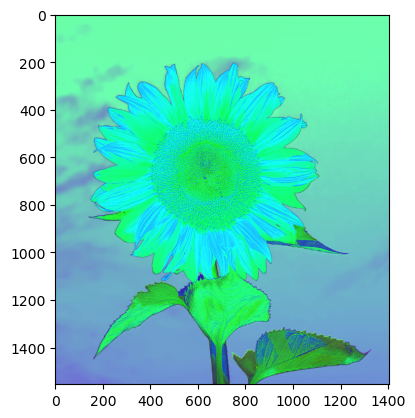

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
image_path = r"C:\Users\estya\OneDrive\Desktop\sunf.jpg"
image = cv.imread(image_path) 

# Convert BGR to HSV
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
plt.imshow(hsv)
plt.show()

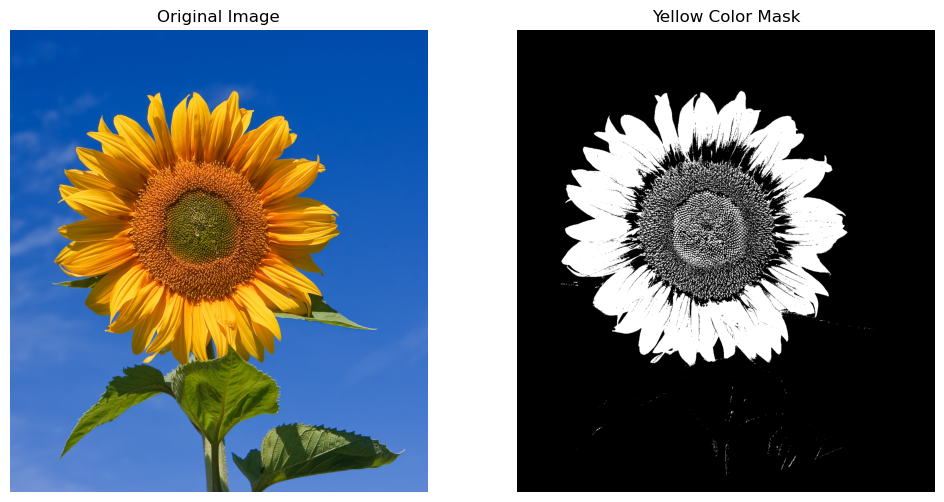

In [5]:
# detecting single color

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
image_path = r"C:\Users\estya\OneDrive\Desktop\sunf.jpg"
image = cv.imread(image_path) 

# Convert BGR to HSV
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Define range of yellow color in HSV
lower_yellow = np.array([15, 100, 100])  # Lower bound for yellow
upper_yellow = np.array([30, 255, 255])  # Upper bound for yellow

# Threshold the HSV image to get only yellow colors
mask = cv.inRange(hsv, lower_yellow, upper_yellow)  # cv.inRange(input_img, lowerb, upperb)

image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Display the images using Matplotlib
plt.figure(figsize=[12, 6])

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Yellow Color Mask')
plt.axis('off')

plt.show()

# Masking

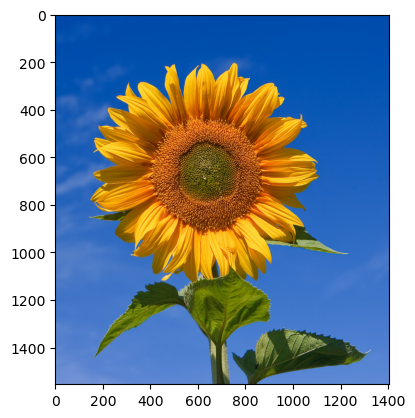

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
image_path = r"C:\Users\estya\OneDrive\Desktop\sunf.jpg"
image = cv.imread(image_path) 

# Convert BGR to HSV
hsv = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(hsv)
plt.show()

# Understanding the Mask Creation Code

## 1. Extract Image Dimensions
```python
height, width, _ = image.shape

    Gets the image dimensions (height, width, channels).

    _ ignores the channels since only height and width are needed.

2. Create an Empty Mask

mask = np.zeros((height, width), dtype=np.uint8)

    Initializes a black mask with all pixels = 0 (black).

    Size is the same as the original image.

3. Define Square Properties

square_size = 800
top_left_x = (width - square_size) // 2
top_left_y = (height - square_size) // 2

    Square size = 800×800.

    top_left_x, top_left_y → position so the square is centered.

4. Draw the White Square

mask[top_left_y:top_left_y + square_size,
     top_left_x:top_left_x + square_size] = 255

    Fills the region with value 255 (white).

    Creates a white square in the middle of the black mask.

5. Display the Mask

plt.imshow(mask)
plt.show()

    Shows the mask (black + white square).

    Add cmap='gray' for correct grayscale visualization.

6. Convert to 3-Channel Mask

mask_3channel = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

    Converts grayscale (1-channel) mask → BGR (3-channel).

    Useful for combining with color images.

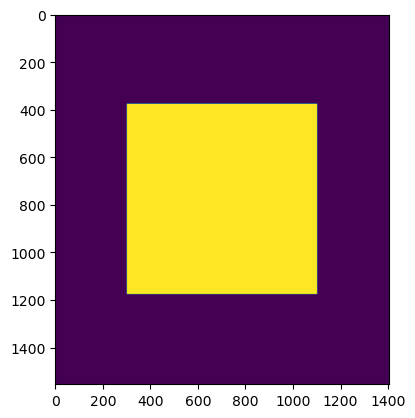

In [9]:
# Get the dimensions of the image
height, width, _ = image.shape

# Create a binary mask of the same size as the image, initialized to zeros (black)
mask = np.zeros((height, width), dtype=np.uint8)

# Define the size and position of the square
square_size = 800  # Size of the square
top_left_x = (width - square_size) // 2
top_left_y = (height - square_size) // 2

# Create a white square in the mask
mask[top_left_y:top_left_y + square_size, top_left_x:top_left_x + square_size] = 255

plt.imshow(mask)

# Convert the mask to a 3-channel mask
mask_3channel = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# plt.imshow(mask_3channel)
plt.show()

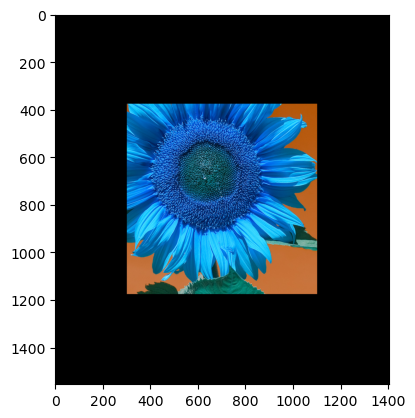

In [ ]:

result = cv.bitwise_and(image, mask_3channel)
#
plt.imshow(result)